## 라이브러리

In [1]:
import numpy as np
import pandas as pd
from konlpy.tag import Okt
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

## 폰트 설정

In [2]:
# 폰트 사이즈 설정
plt.rcParams['font.size'] = 25
# 폰트 설정 다른 방법
plt.rcParams['font.family'] = 'Malgun Gothic'
# 화면크기 설정
plt.rcParams['figure.figsize'] = (18,20)

## 함수

In [3]:
# okt 형태소 분석기 토크나이징
def tokenize(text):
    okt = Okt()
    tokens = okt.pos(text)

#     stop_words = ['있는', '하는', '생각', '합니다', '대한', '필요', '먼저'
#              '한다', '마음', '문제', '대통령', '위해', '않는', '의견', '나라']
#     tokens = [(word, tag) for word, tag in tokens if word not in stop_words]
    
    total_words = []
    for word, tag in tokens:
        if tag not in ['Josa', 'Suffix']:
            total_words.append(word)
    result = ' '.join(total_words)
    return result

In [4]:
def tfidf_data(text_data):
    _tokeniz = text_data.map(tokenize)

    _word = []
    for sentence in [text for text in _tokeniz.values]:
        for word in sentence.split(' '):
            if word not in stop_word:
                _word.append(word)

    _total_word = []
    _total_word.append(' '.join(_word))

    _tfidf_matrix = tfidf.transform(_total_word)

    _tfidf_word = []
    _tfidf = []

    for i in range(20,0,-1):
        _tfidf_word.append(idx2word[(-_tfidf_matrix.toarray()[0]).argsort()[i-1]])
        _tfidf.append(_tfidf_matrix.toarray()[0][(-_tfidf_matrix.toarray()[0]).argsort()[i-1]])
        
    return _tfidf_word, _tfidf

In [5]:
# Tf-idf 가로 바 그래프 그리기
def tfidf_graph(word, tfidf, title):
    #plt.figure(figsize=(20,16))
    colors = sns.color_palette('hls', 25)
    plt.barh(word, tfidf,
             label='TF-IDF',
             color=colors)
    plt.legend()
    plt.ylabel('단어')
    plt.xlabel('TF-IDF')
    plt.title('{} 텍스트 TF-IDF Top20'.format(title))
    plt.yticks(word)
    
    for i, x in enumerate(word):
        tfidf_score = ' {:.2f}'.format(tfidf[i])
        plt.text(tfidf[i], x, tfidf_score, fontsize=18, color='#000000',
                 horizontalalignment='left', verticalalignment='center')
    plt.show()
    
    return None

## 불용어 사전

In [6]:
# 불용어 리스트
stop_word = ['있는', '하는', '생각', '합니다', '대한', '필요', '먼저', '않고', '아닌', '리더십',
             '한다', '마음', '문제', '대통령', '위해', '않는', '의견', '나라', '좋겠습니다', '하며',
             '한다고', '하지', '해야', '있어야', '우리나라', '우선', '노력', '좋겠다', '하기', '하고',
             '아는', '없는', '그리고']

## 데이터 로드

In [8]:
path = './210809_다음대통령텍스트_단문rawdata.xlsx'

df = pd.read_excel(path, sheet_name=1, index_col=False)
df

,성별,나이,거주지,텍스트,전처리_텍스트,텍스트 길이,나이대,거주지_6권역,거주지_수도권구분
0,1,36,1,e,NaN,0,3,1,1
1,2,28,1,테스트,테스트,3,2,1,1
2,1,18,4,테스트,테스트,3,1,1,1
3,2,31,2,결단력,결단력,3,3,5,2
4,2,24,7,공약 지키기,공약 지키기,5,2,5,2
...,...,...,...,...,...,...,...,...,...
20494,1,25,12,정치잘하고 비리조없에줘요,정치잘하고 비리조없에줘요,12,2,3,2
20495,2,40,1,부동산 안정화,부동산 안정화,6,4,1,1
20496,1,32,1,경제관념,경제관념,4,3,1,1
20497,1,53,1,비전과 능력,비전과 능력,5,5,1,1


In [9]:
# 필요한 데이터만 가져오기
new_df = df.drop(['나이', '거주지', '텍스트'], axis=1)
new_df

,성별,전처리_텍스트,텍스트 길이,나이대,거주지_6권역,거주지_수도권구분
0,1,NaN,0,3,1,1
1,2,테스트,3,2,1,1
2,1,테스트,3,1,1,1
3,2,결단력,3,3,5,2
4,2,공약 지키기,5,2,5,2
...,...,...,...,...,...,...
20494,1,정치잘하고 비리조없에줘요,12,2,3,2
20495,2,부동산 안정화,6,4,1,1
20496,1,경제관념,4,3,1,1
20497,1,비전과 능력,5,5,1,1


In [10]:
new_df['전처리_텍스트'].isna().sum()

350

In [11]:
new_df = new_df.dropna(axis=0)
new_df

,성별,전처리_텍스트,텍스트 길이,나이대,거주지_6권역,거주지_수도권구분
1,2,테스트,3,2,1,1
2,1,테스트,3,1,1,1
3,2,결단력,3,3,5,2
4,2,공약 지키기,5,2,5,2
5,2,유도리,3,2,2,2
...,...,...,...,...,...,...
20494,1,정치잘하고 비리조없에줘요,12,2,3,2
20495,2,부동산 안정화,6,4,1,1
20496,1,경제관념,4,3,1,1
20497,1,비전과 능력,5,5,1,1


# 데이터 분리

## 성별 비교

In [12]:
# 남자
male_text = new_df['전처리_텍스트'][new_df['성별']==1]
male_text

2                   테스트
6               도덕성과 인품
7        문제 해결 능력이 필요하다
9               도덕성 리더십
11             공산주의자 척결
              ...      
20491               외교력
20492           소신 청렴결백
20494     정치잘하고 비리조없에줘요
20496              경제관념
20497            비전과 능력
Name: 전처리_텍스트, Length: 7394, dtype: object

In [13]:
# 여자
female_text = new_df['전처리_텍스트'][new_df['성별']==2]
female_text

1                 테스트
3                 결단력
4              공약 지키기
5                 유도리
8        융통성이라고 생각합니다
             ...     
20489         진정성 현명함
20490            카리스마
20493       시민들의 의견듣기
20495         부동산 안정화
20498       정직함  통찰력 
Name: 전처리_텍스트, Length: 12755, dtype: object

## 나이 비교

In [14]:
# 10대
age_10 = new_df['전처리_텍스트'][new_df['나이대']==1]
age_10

2                   테스트
7        문제 해결 능력이 필요하다
36         시민들을 생각하는 마음
38                 없습니다
52               청렴한 사람
              ...      
20480    소통 공약실천 올바른 정치
20481      외교적 문제 대처 능력
20486           국민들의 요구
20488                실천
20491               외교력
Name: 전처리_텍스트, Length: 1943, dtype: object

In [15]:
age_20 = new_df['전처리_텍스트'][new_df['나이대']==2]
age_20

1                  테스트
4               공약 지키기
5                  유도리
8         융통성이라고 생각합니다
11            공산주의자 척결
             ...      
20484               양심
20485             역지사지
20493        시민들의 의견듣기
20494    정치잘하고 비리조없에줘요
20498        정직함  통찰력 
Name: 전처리_텍스트, Length: 5634, dtype: object

In [16]:
age_30 = new_df['전처리_텍스트'][new_df['나이대']==3]
age_30

3                   결단력
10                  추진력
13         올바른 역사의식과 청렴
15               위기관리능력
19                  모름 
              ...      
20472                신뢰
20479    국민의 생활안정 부동산정책
20487       국민들을 위하는 마음
20489           진정성 현명함
20496              경제관념
Name: 전처리_텍스트, Length: 6195, dtype: object

In [17]:
age_40 = new_df['전처리_텍스트'][new_df['나이대']==4]
age_40

6            도덕성과 인품
12        서민들을 위한 정책
18       도덕성 경제관념 등등
32               물론 
40       경제를 살릴수 있는분
            ...     
20468    공정성진실성미래예측성
20474         잘 모르겠다
20490           카리스마
20492        소신 청렴결백
20495        부동산 안정화
Name: 전처리_텍스트, Length: 4075, dtype: object

In [18]:
age_50 = new_df['전처리_텍스트'][new_df['나이대']==5]
age_50

9           도덕성 리더십
65             카리스마
70           국민 대통합
73              통솔력
89            정직 공정
            ...    
20429           통합력
20438    추진력 가치관 비젼
20443       덕망과 결단력
20453           공정성
20497        비전과 능력
Name: 전처리_텍스트, Length: 1737, dtype: object

In [19]:
age_60 = new_df['전처리_텍스트'][new_df['나이대']==6]
age_60

23            청렴하고 경제 회복
29              도덕성과 리더쉽
133       슬기로운지혜와 굳은 의지력
184        집값 안정 도덕성 성실 
216             제대로 된 인사
              ...       
19864             리더십 정직
19875    빈부격차 해소 부동산 문제 
20202                대통합
20300          소통 유연한 생각
20309      경제를살리는 대통령입니다
Name: 전처리_텍스트, Length: 565, dtype: object

## 청년층 vs 중장년층

In [20]:
# 청년층 (10~30대)
age_1030 = new_df['전처리_텍스트'][new_df['나이대']<=3]
age_1030

1                  테스트
2                  테스트
3                  결단력
4               공약 지키기
5                  유도리
             ...      
20491              외교력
20493        시민들의 의견듣기
20494    정치잘하고 비리조없에줘요
20496             경제관념
20498        정직함  통찰력 
Name: 전처리_텍스트, Length: 13772, dtype: object

In [21]:
# 중장년층 (40~60대 이상)
age_4060 = new_df['전처리_텍스트'][new_df['나이대']>=4]
age_4060

6            도덕성과 인품
9            도덕성 리더십
12        서민들을 위한 정책
18       도덕성 경제관념 등등
23        청렴하고 경제 회복
            ...     
20474         잘 모르겠다
20490           카리스마
20492        소신 청렴결백
20495        부동산 안정화
20497         비전과 능력
Name: 전처리_텍스트, Length: 6377, dtype: object

## 지역 비교

In [22]:
# 수도권
sudo = new_df['전처리_텍스트'][new_df['거주지_6권역']==1]
sudo

1                   테스트
2                   테스트
6               도덕성과 인품
7        문제 해결 능력이 필요하다
9               도덕성 리더십
              ...      
20493         시민들의 의견듣기
20495           부동산 안정화
20496              경제관념
20497            비전과 능력
20498         정직함  통찰력 
Name: 전처리_텍스트, Length: 11926, dtype: object

In [23]:
# 충청권
choong = new_df['전처리_텍스트'][new_df['거주지_6권역']==2]
choong

5                 유도리
42       위기극복 외교 사회복지
48         결단력 포용력 반중
72                천리안
76               정권교체
             ...     
20405              균형
20442              모름
20459             책임감
20477             진실함
20490            카리스마
Name: 전처리_텍스트, Length: 1787, dtype: object

In [24]:
# 전라권
junla = new_df['전처리_텍스트'][new_df['거주지_6권역']==3]
junla

8          융통성이라고 생각합니다
18          도덕성 경제관념 등등
19                  모름 
20          진짜 서민층을생사솨는
33          공정성  국민대통합 
              ...      
20418                지식
20420          휘둘리지않는마음
20429               통합력
20479    국민의 생활안정 부동산정책
20494     정치잘하고 비리조없에줘요
Name: 전처리_텍스트, Length: 1494, dtype: object

In [25]:
# 강원권 
kangwon = new_df['전처리_텍스트'][new_df['거주지_6권역']==4]
kangwon

17                진실성 통찰력
63             결단력 추진력 정직
126        국민이 대통령이라는  마음
130                    지혜
177      부를 가졌다고 변하지 않는 것
               ...       
20311               법 준수 
20316                 판단력
20401              공약 실행력
20422              사회문제파악
20439       국민들과의 명확한 소통 
Name: 전처리_텍스트, Length: 390, dtype: object

In [26]:
# 경상권
kyungsang = new_df['전처리_텍스트'][new_df['거주지_6권역']==5]
kyungsang

3                    결단력
4                 공약 지키기
11              공산주의자 척결
13          올바른 역사의식과 청렴
14                    모름
              ...       
20472                 신뢰
20474             잘 모르겠다
20478    리더십 국민을 생각하는 마음
20483           경제회복 추진력
20488                 실천
Name: 전처리_텍스트, Length: 4387, dtype: object

In [27]:
# 제주도
jeju = new_df['전처리_텍스트'][new_df['거주지_6권역']==6]
jeju

205                  몰라요
344               인성과 안목
998            균형감각과 리더십
1017           국민을 위한 통치
1019             추진력 진실성
              ...       
20100             도덕성 인성
20204       다양성 존중과 국가안전
20257    국민들을 위한것 좋은대통령 
20327             여가부 폐지
20395                성실함
Name: 전처리_텍스트, Length: 165, dtype: object

## 수도권 vs 수도권외

In [28]:
ok_sudo = new_df['전처리_텍스트'][new_df['거주지_수도권구분']==1]
ok_sudo

1                   테스트
2                   테스트
6               도덕성과 인품
7        문제 해결 능력이 필요하다
9               도덕성 리더십
              ...      
20493         시민들의 의견듣기
20495           부동산 안정화
20496              경제관념
20497            비전과 능력
20498         정직함  통찰력 
Name: 전처리_텍스트, Length: 11926, dtype: object

In [29]:
non_sudo = new_df['전처리_텍스트'][new_df['거주지_수도권구분']==2]
non_sudo

3                   결단력
4                공약 지키기
5                   유도리
8          융통성이라고 생각합니다
11             공산주의자 척결
              ...      
20479    국민의 생활안정 부동산정책
20483          경제회복 추진력
20488                실천
20490              카리스마
20494     정치잘하고 비리조없에줘요
Name: 전처리_텍스트, Length: 8223, dtype: object

## 단문 전체 텍스트 tfidf

In [30]:
# josa , suffix 제거
total_tokenize = new_df['전처리_텍스트'].map(tokenize)
total_tokenize

1                    테스트
2                    테스트
3                     결단
4                 공약 지키기
5                   유 도리
              ...       
20494    정치 잘하고 비리 없에 줘요
20495            부동산 안정화
20496              경제 관념
20497            비 전과 능력
20498             정직함 통찰
Name: 전처리_텍스트, Length: 20149, dtype: object

In [31]:
# tf-idf 생성
tfidf = TfidfVectorizer(max_features=100, min_df=100).fit(total_tokenize)
# 단어사전 정렬
word_dict = sorted(tfidf.vocabulary_.items())
idx2word = {idx:word for word, idx in word_dict}

In [32]:
male_tfidf_word, male_tfidf = tfidf_data(male_text)

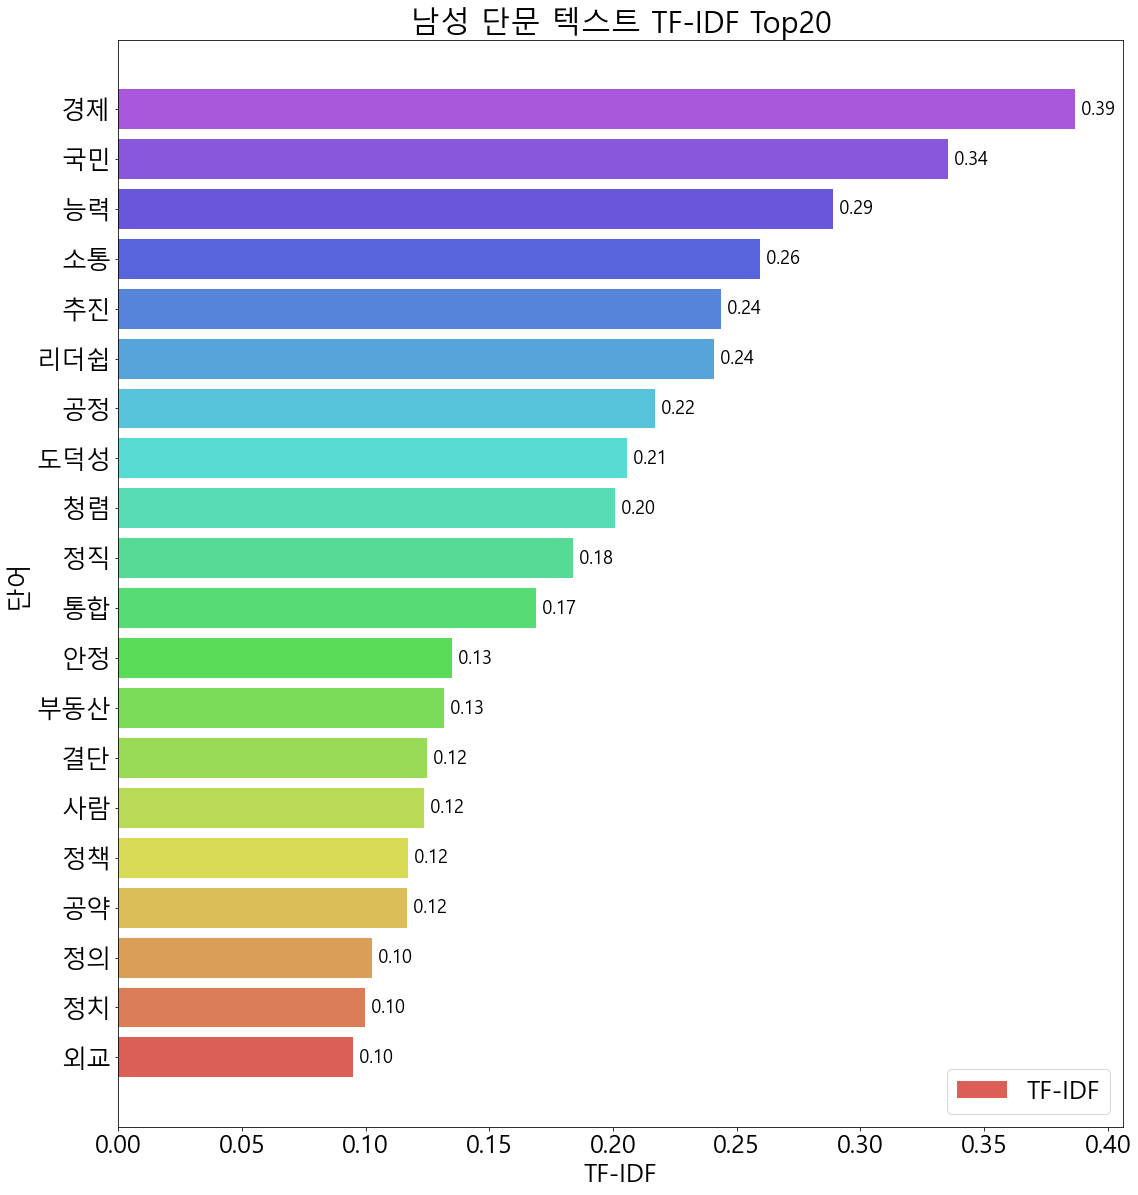

In [33]:
tfidf_graph(male_tfidf_word, male_tfidf, '남성 단문')

In [34]:
female_tfidf_word, female_tfidf = tfidf_data(female_text)

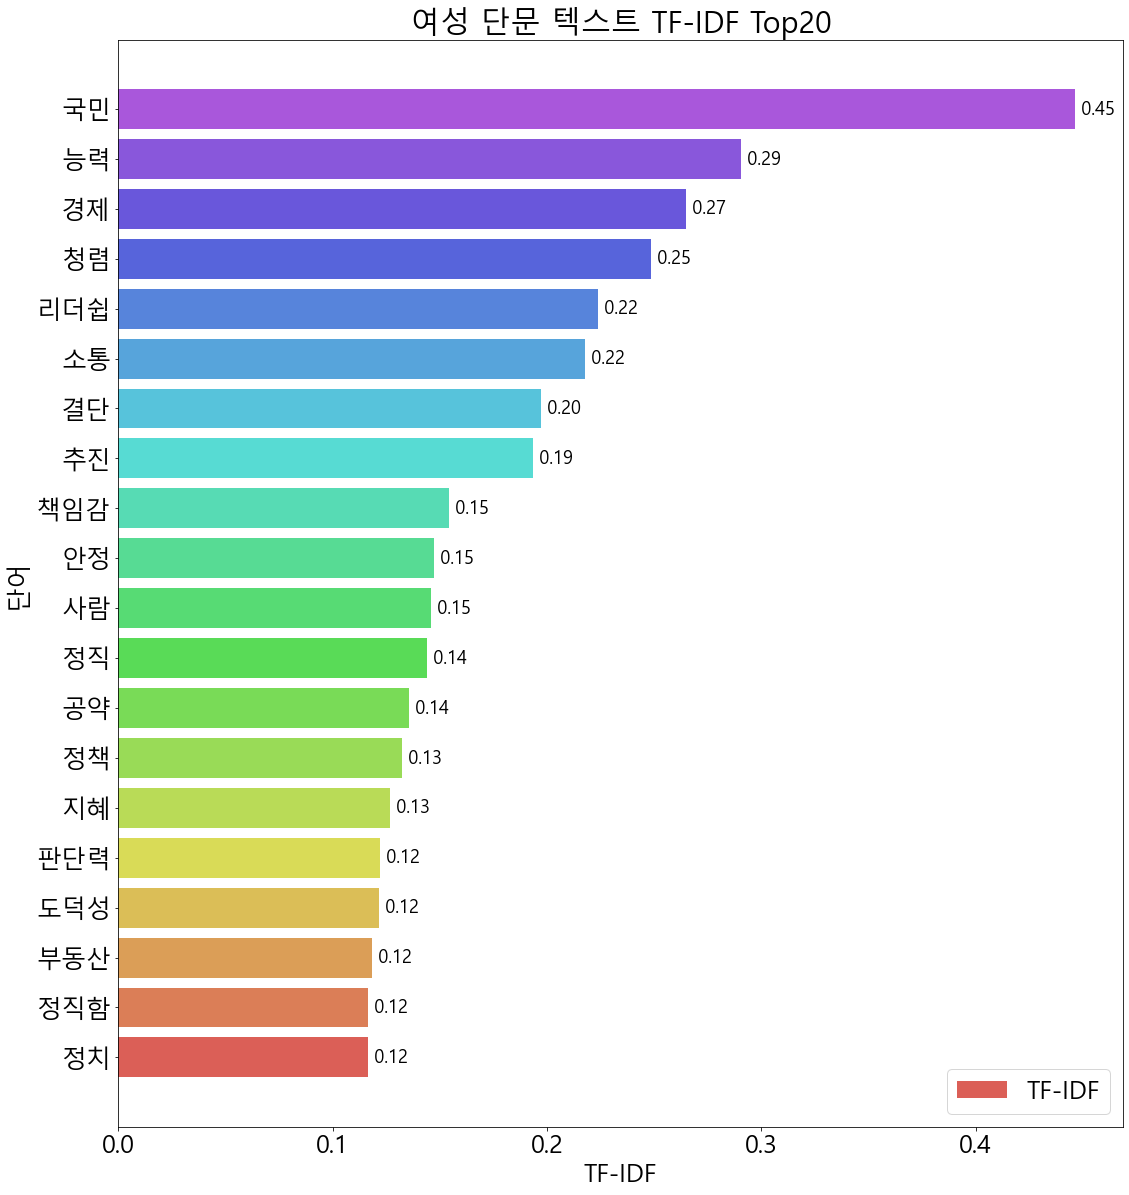

In [35]:
tfidf_graph(female_tfidf_word, female_tfidf, '여성 단문')

# 나이

## 10대

In [36]:
age10_tfidf_word, age10_tfidf = tfidf_data(age_10)

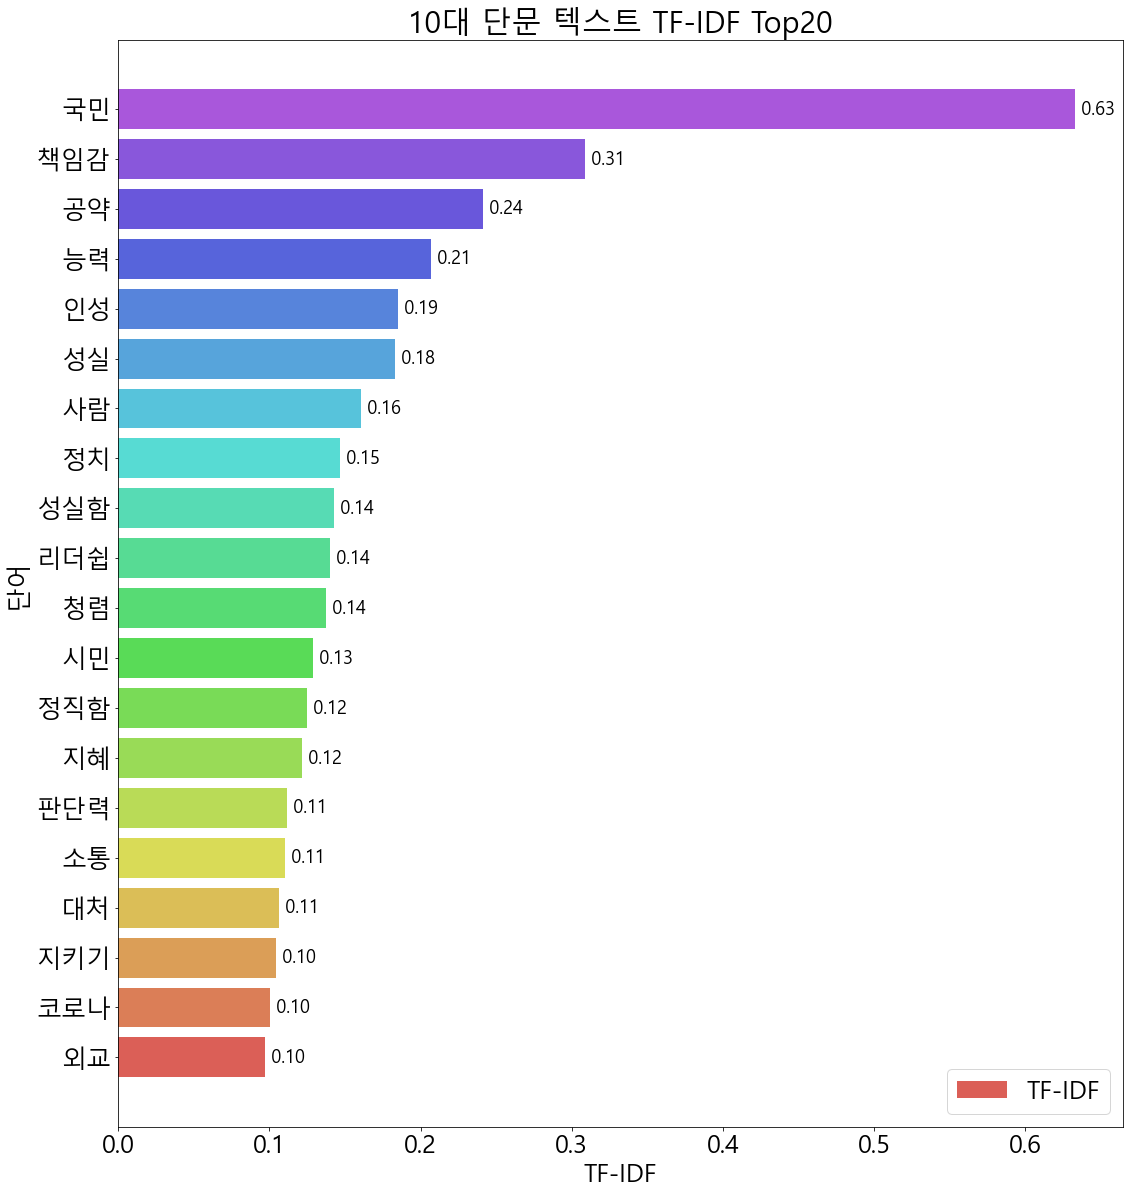

In [37]:
tfidf_graph(age10_tfidf_word, age10_tfidf, '10대 단문')

## 20대

In [38]:
age20_tfidf_word, age20_tfidf = tfidf_data(age_20)

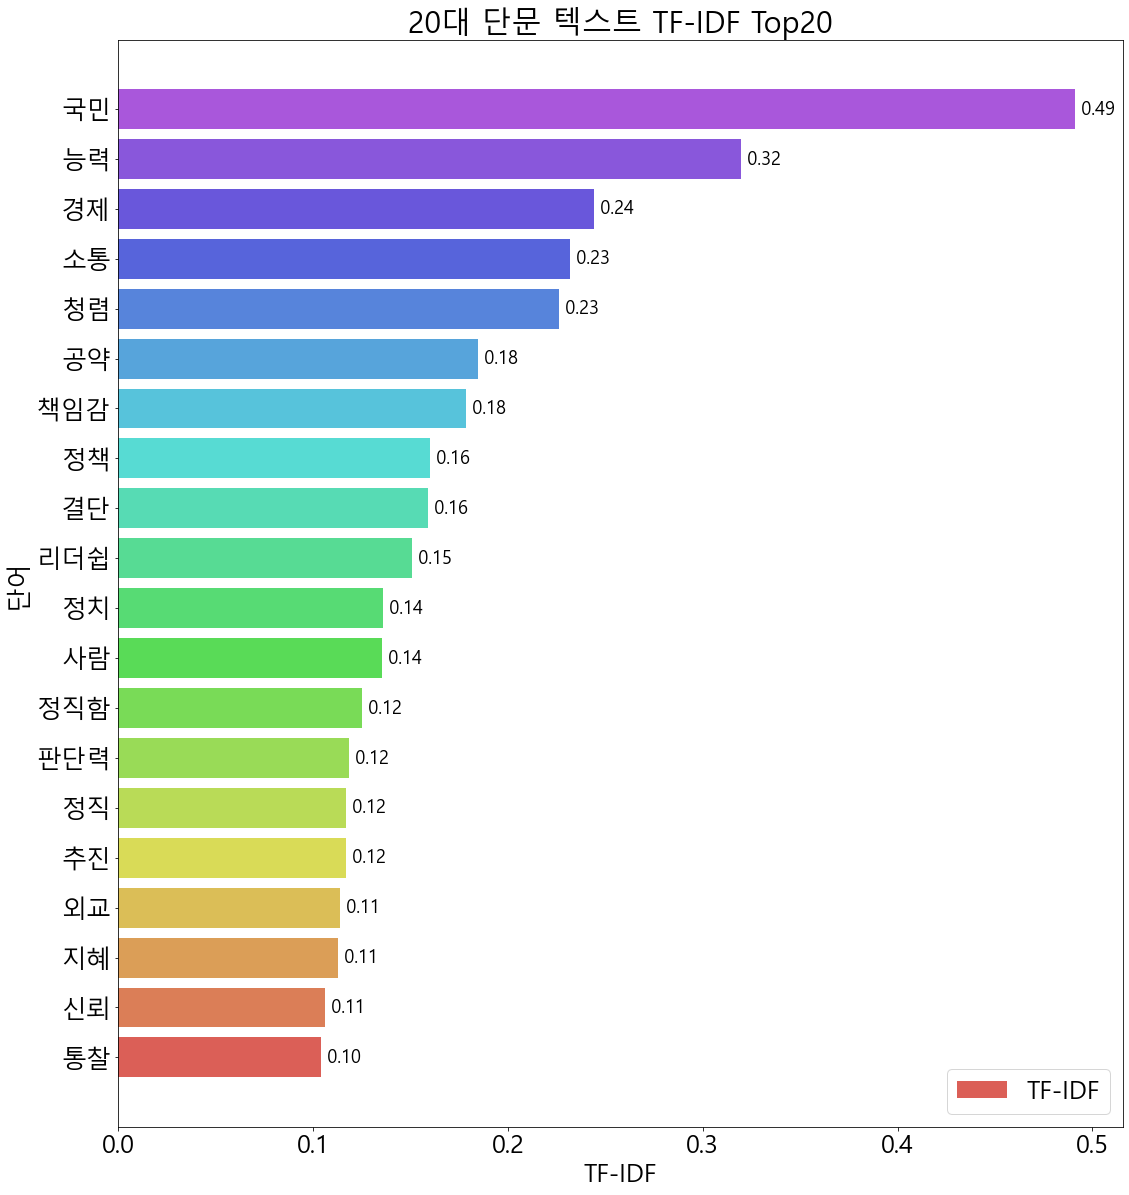

In [39]:
tfidf_graph(age20_tfidf_word, age20_tfidf, '20대 단문')

## 30대

In [40]:
age30_tfidf_word, age30_tfidf = tfidf_data(age_30)

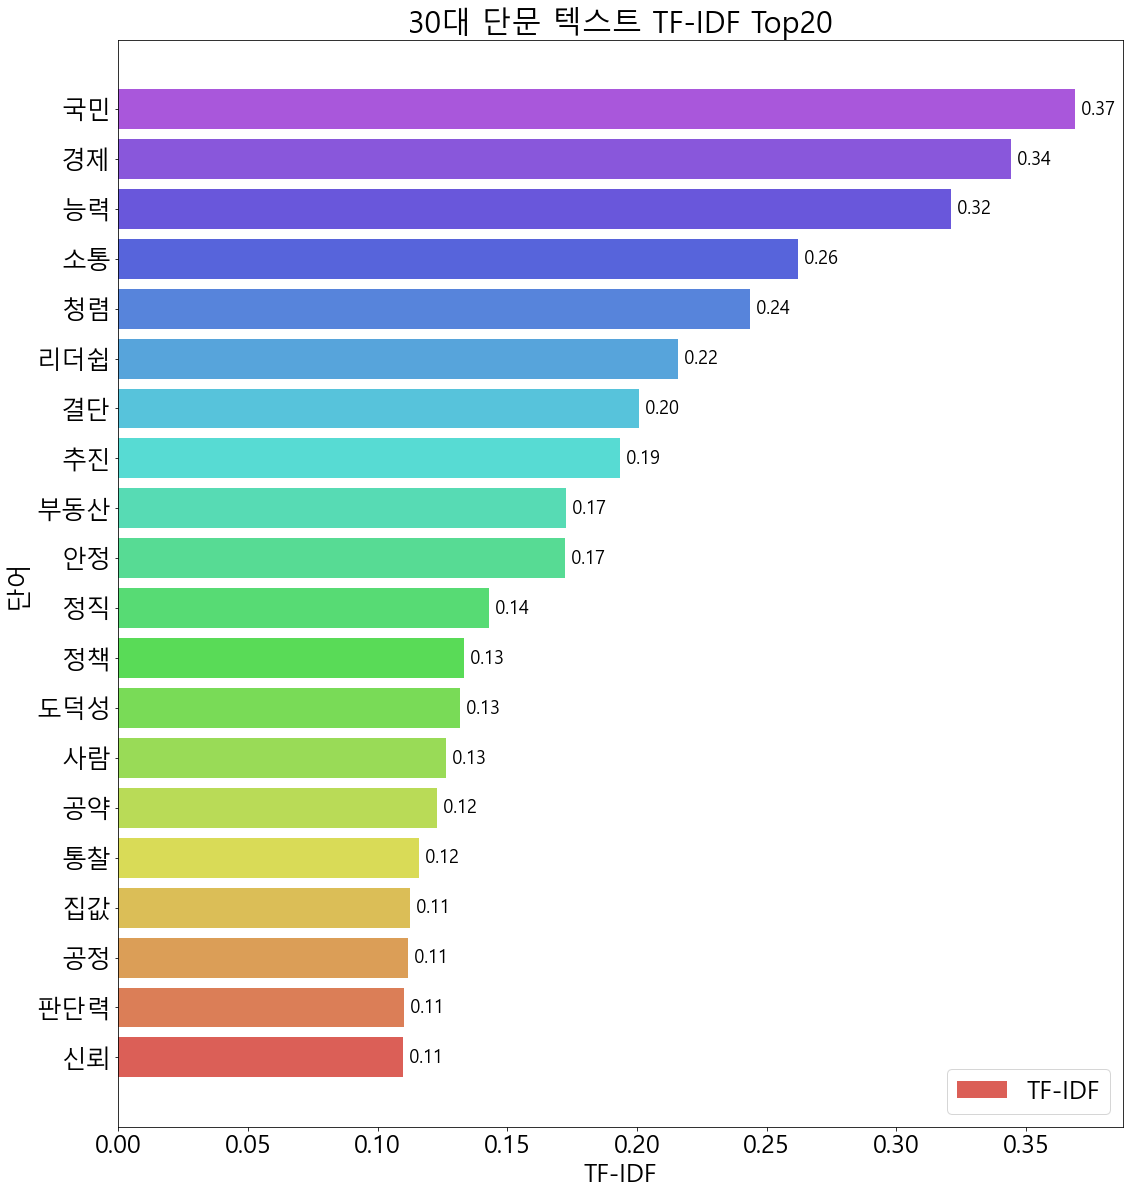

In [41]:
tfidf_graph(age30_tfidf_word, age30_tfidf, '30대 단문')

## 40대

In [42]:
age40_tfidf_word, age40_tfidf = tfidf_data(age_40)

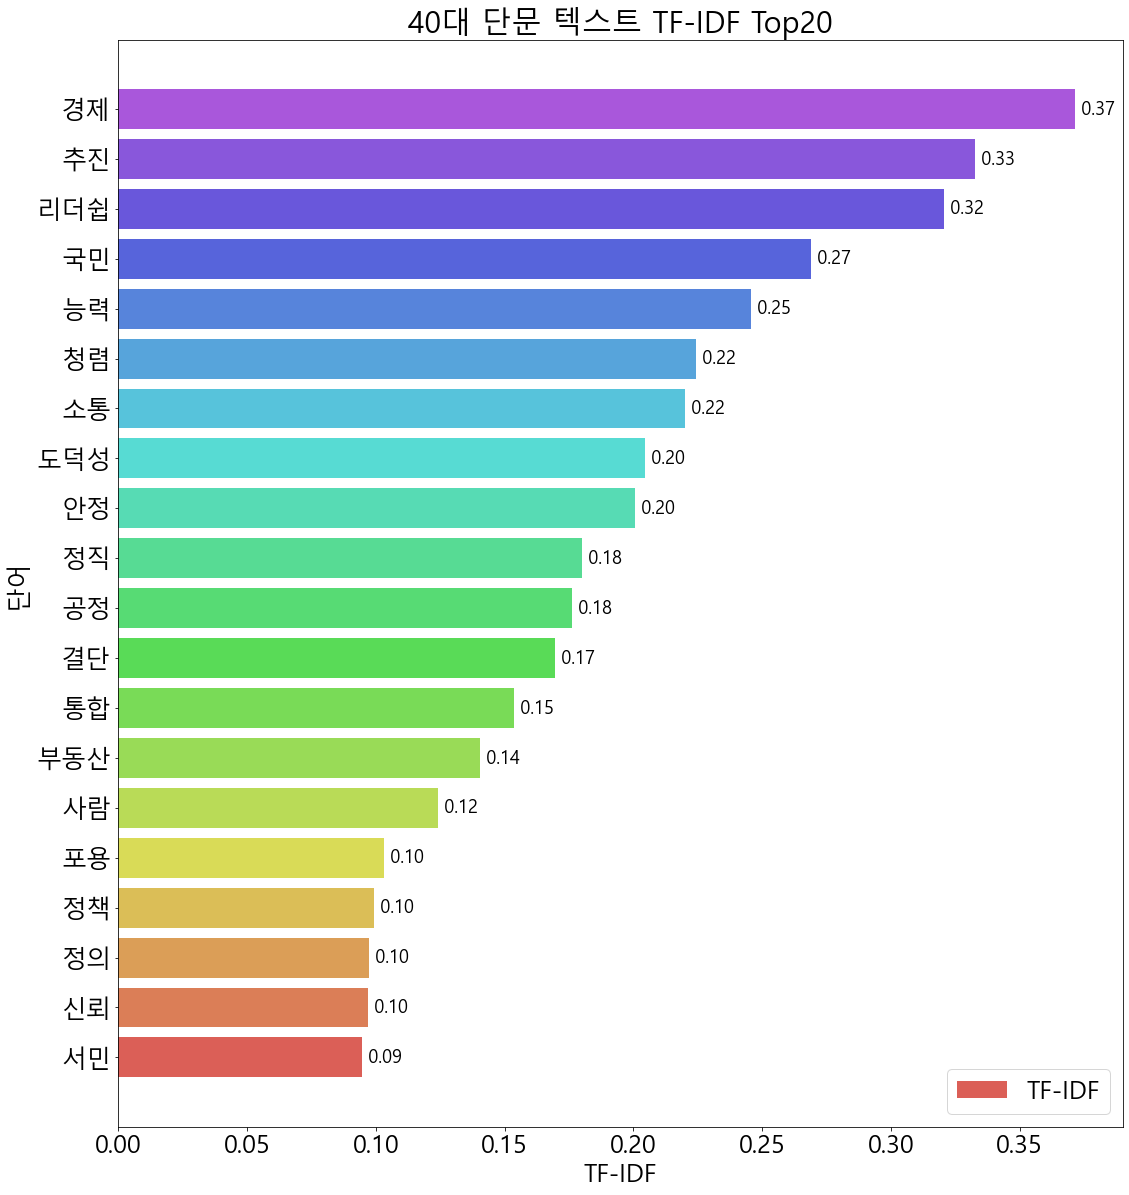

In [43]:
tfidf_graph(age40_tfidf_word, age40_tfidf, '40대 단문')

## 50대

In [44]:
age50_tfidf_word, age50_tfidf = tfidf_data(age_50)

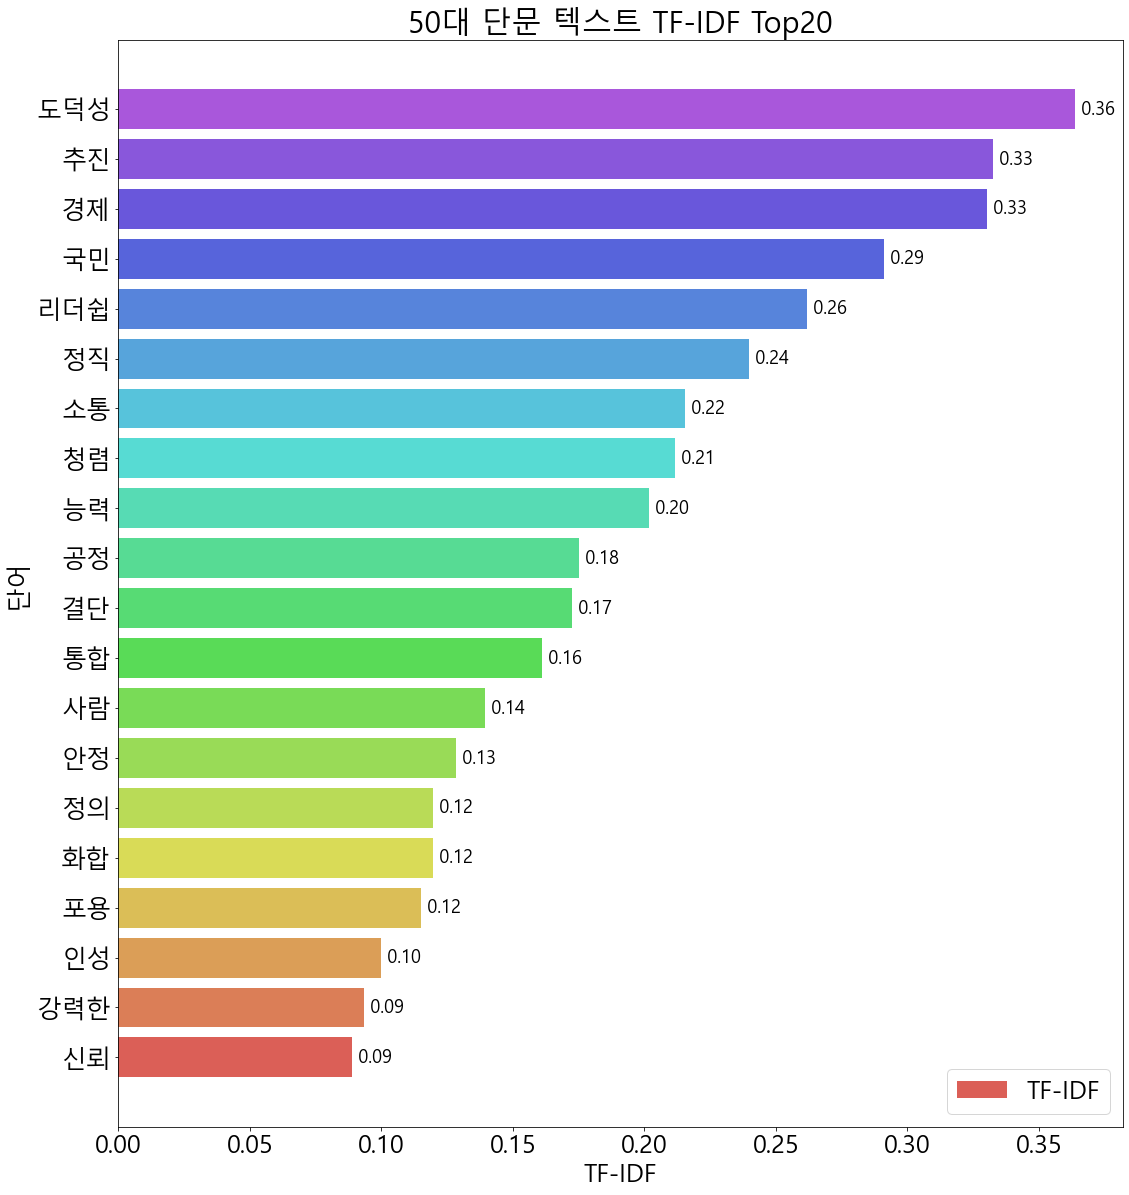

In [45]:
tfidf_graph(age50_tfidf_word, age50_tfidf, '50대 단문')

## 60대 이상

In [46]:
age60_tfidf_word, age60_tfidf = tfidf_data(age_60)

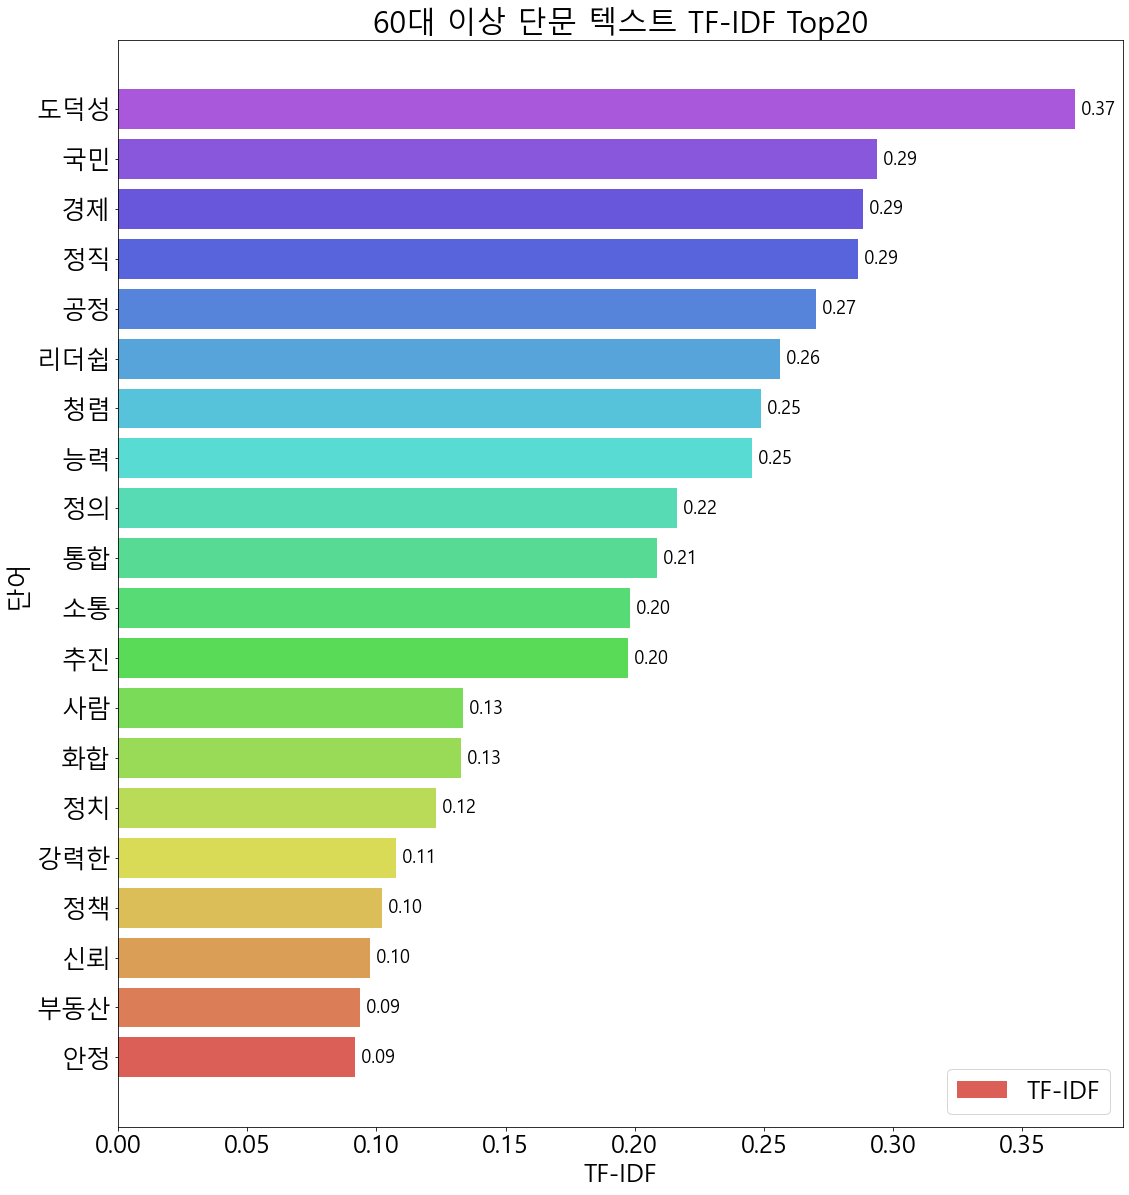

In [47]:
tfidf_graph(age60_tfidf_word, age60_tfidf, '60대 이상 단문')

## 청년층

In [54]:
age1030_tfidf_word, age1030_tfidf = tfidf_data(age_1030)

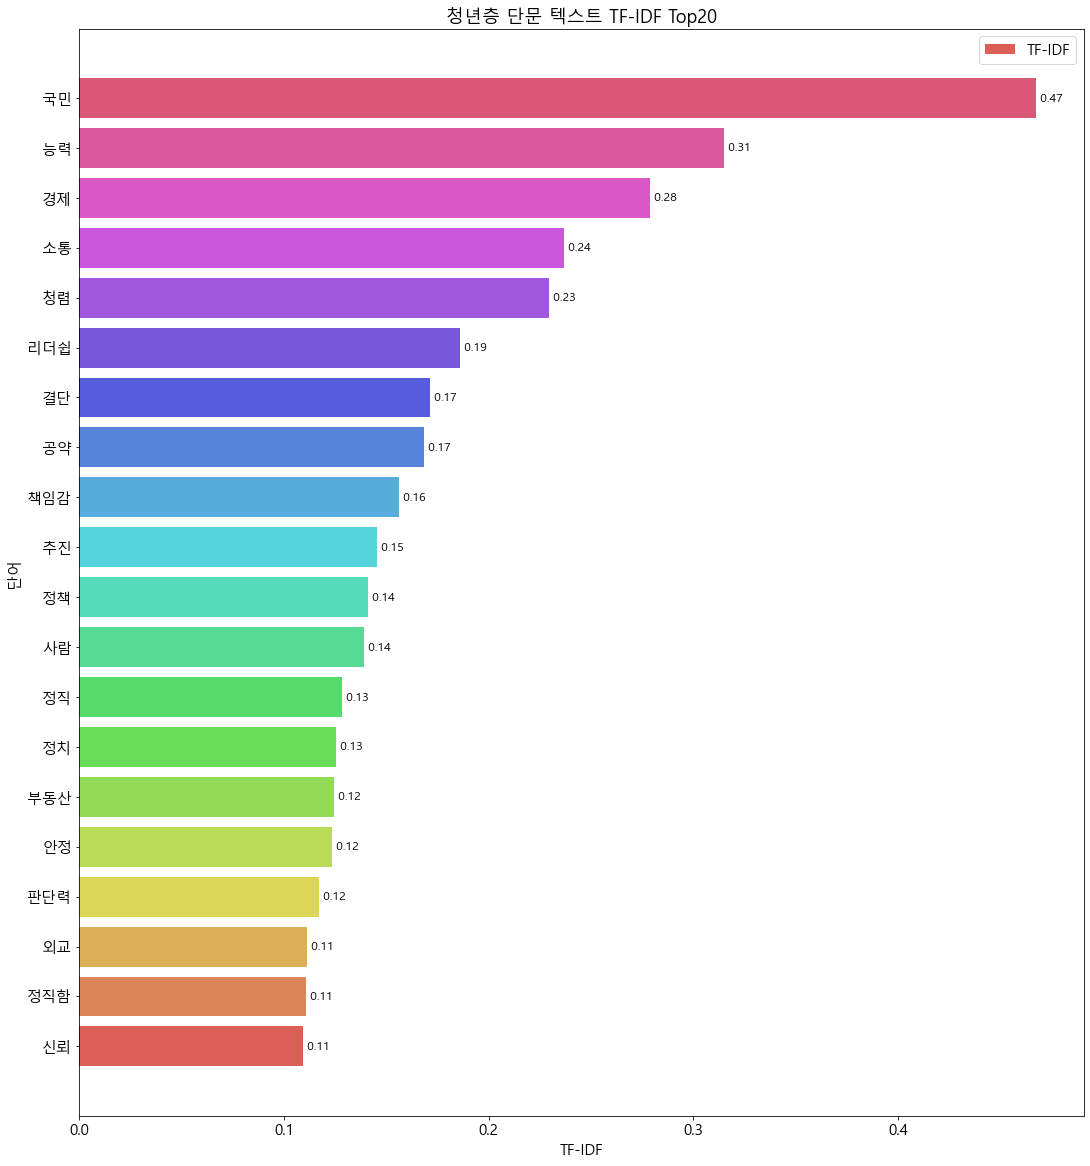

In [55]:
tfidf_graph(age1030_tfidf_word, age1030_tfidf, '청년층 단문')

## 중장년층

In [56]:
age4060_tfidf_word, age4060_tfidf = tfidf_data(age_4060)

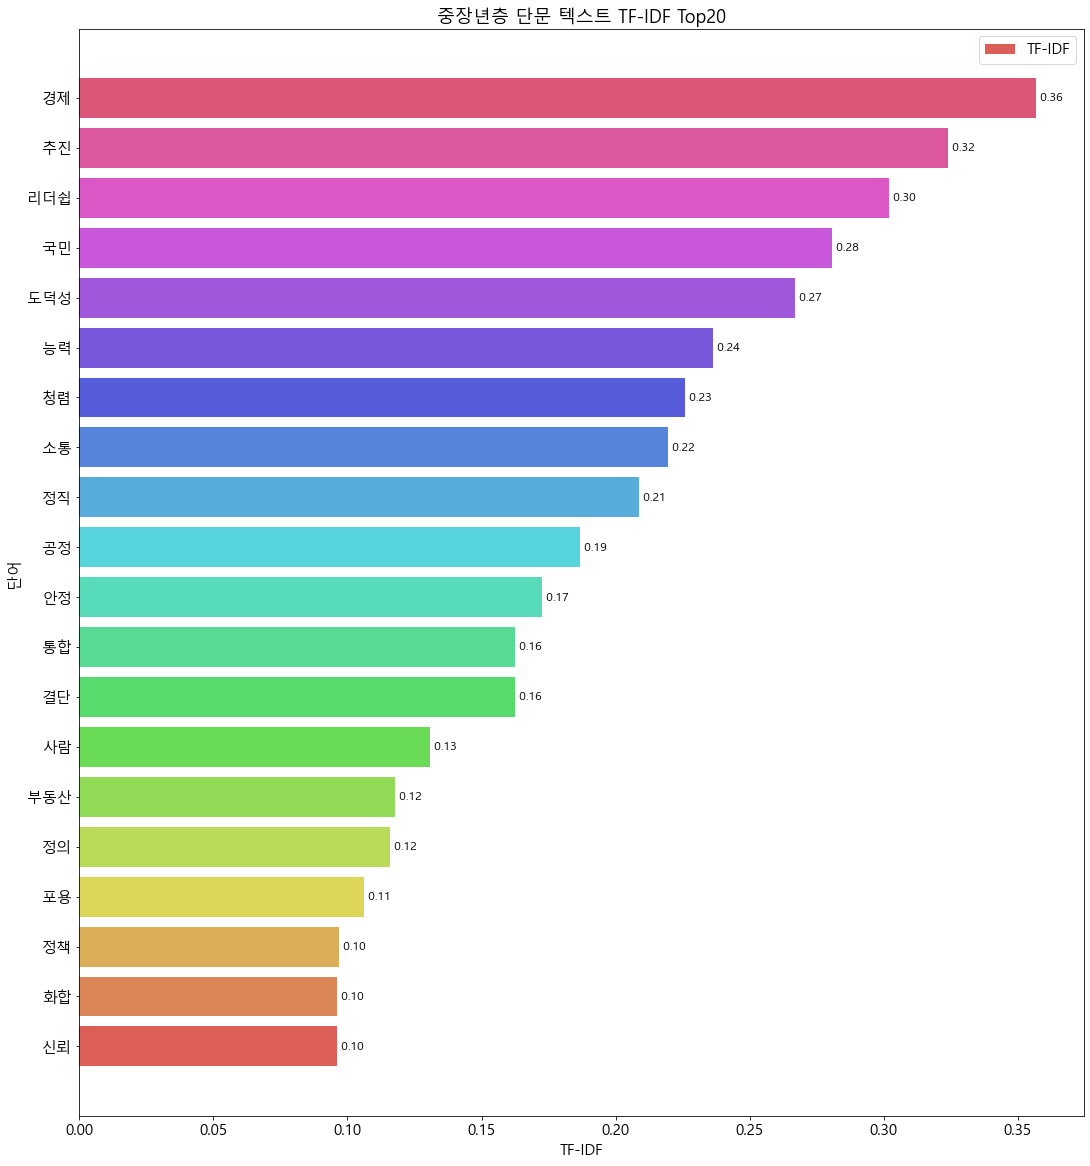

In [57]:
tfidf_graph(age4060_tfidf_word, age4060_tfidf, '중장년층 단문')

# 지역

## 수도권

In [48]:
sudo_tfidf_word, sudo_tfidf = tfidf_data(sudo)

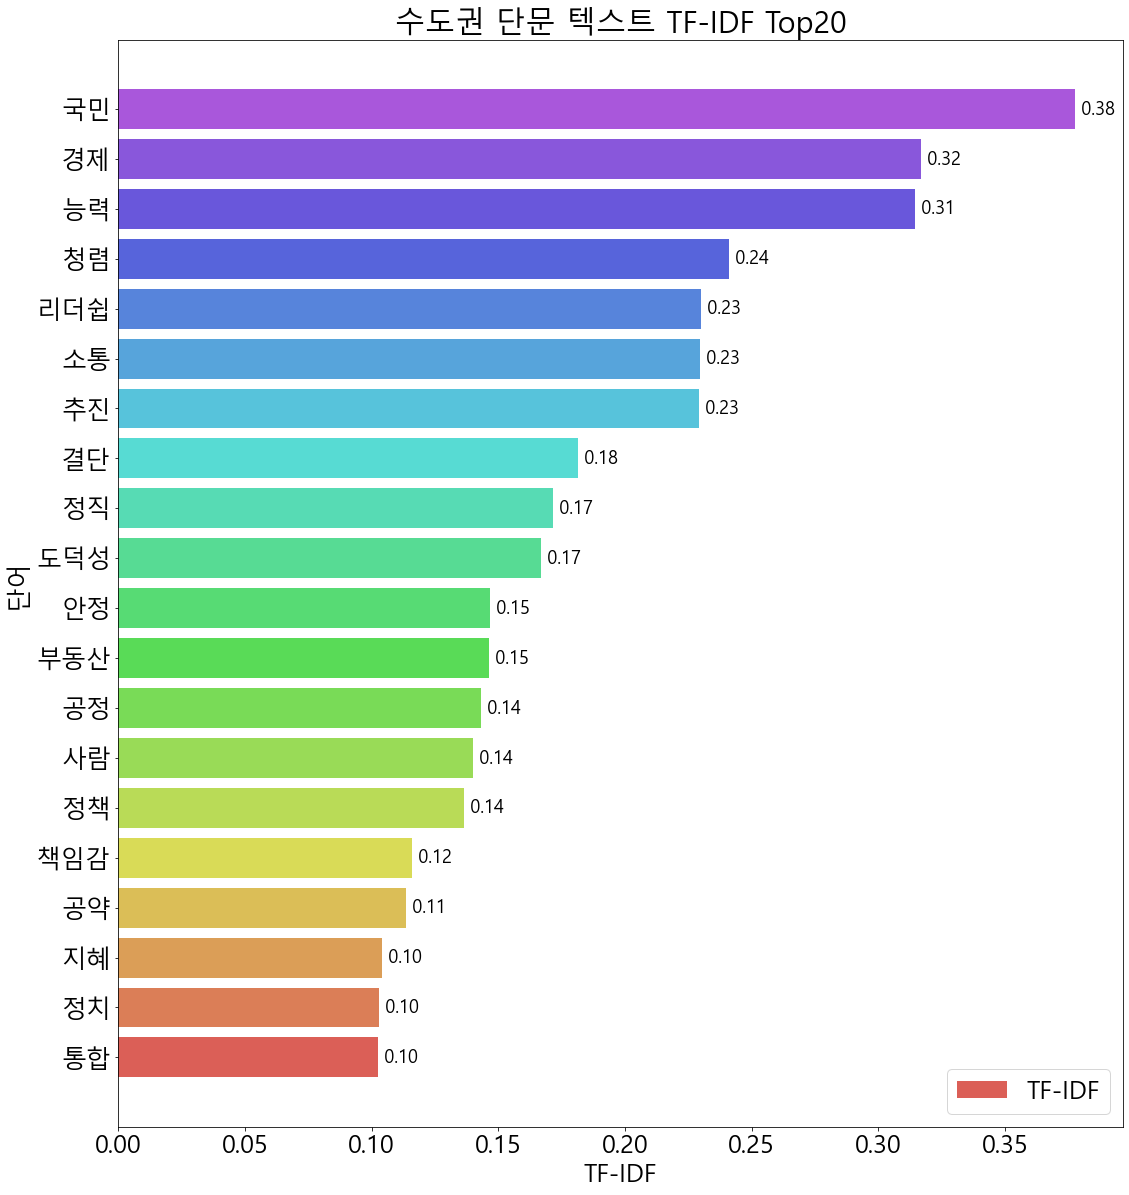

In [49]:
tfidf_graph(sudo_tfidf_word, sudo_tfidf, '수도권 단문')

## 충청권

In [50]:
choong_tfidf_word, choong_tfidf = tfidf_data(choong)

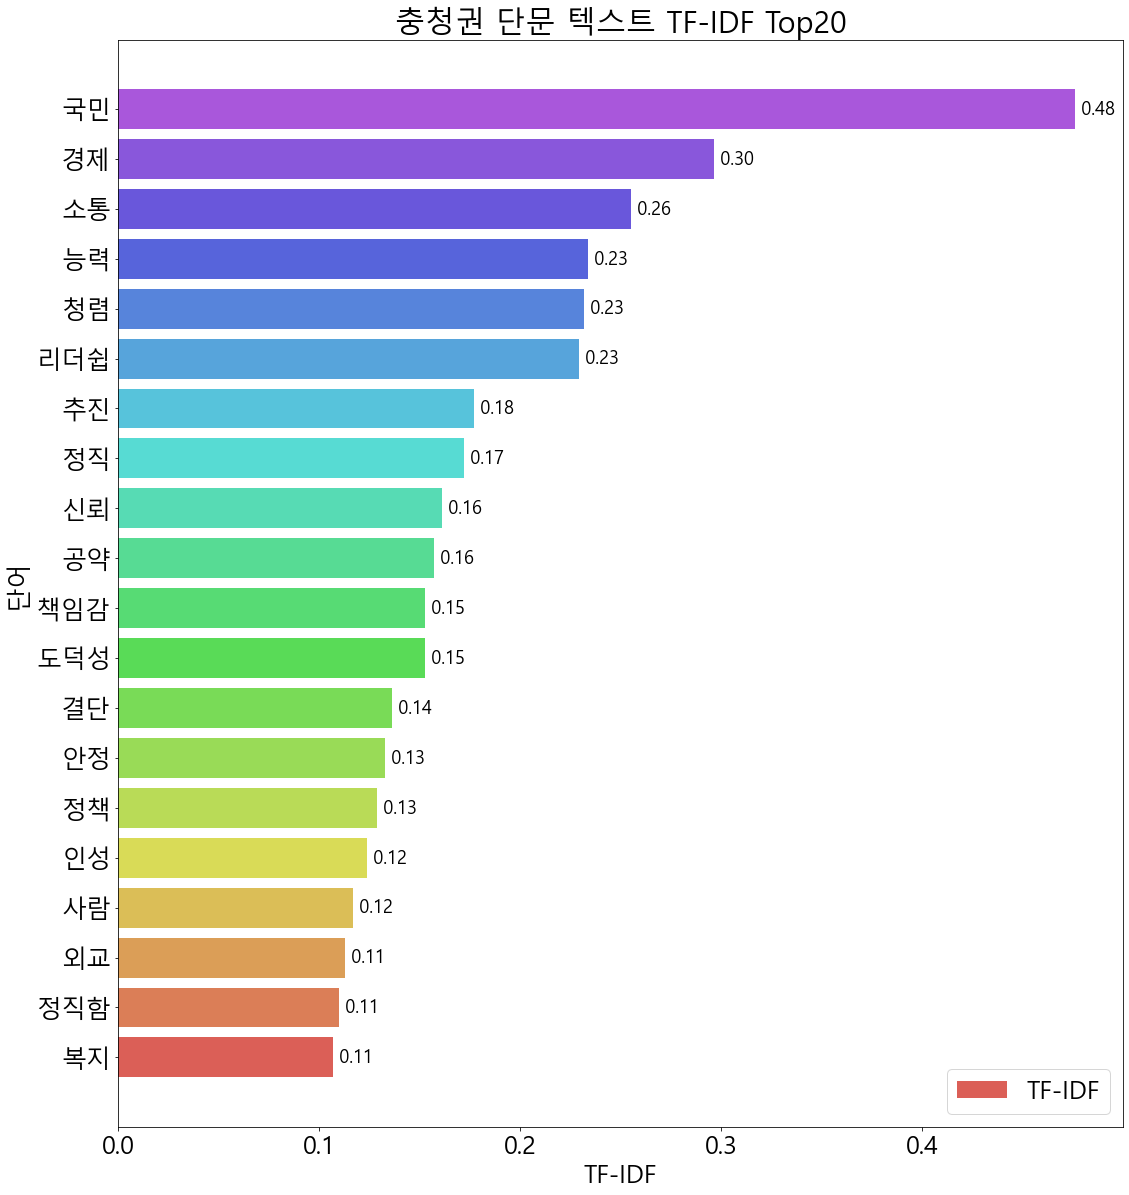

In [51]:
tfidf_graph(choong_tfidf_word, choong_tfidf, '충청권 단문')

## 전라권

In [52]:
junla_tfidf_word, junla_tfidf = tfidf_data(junla)

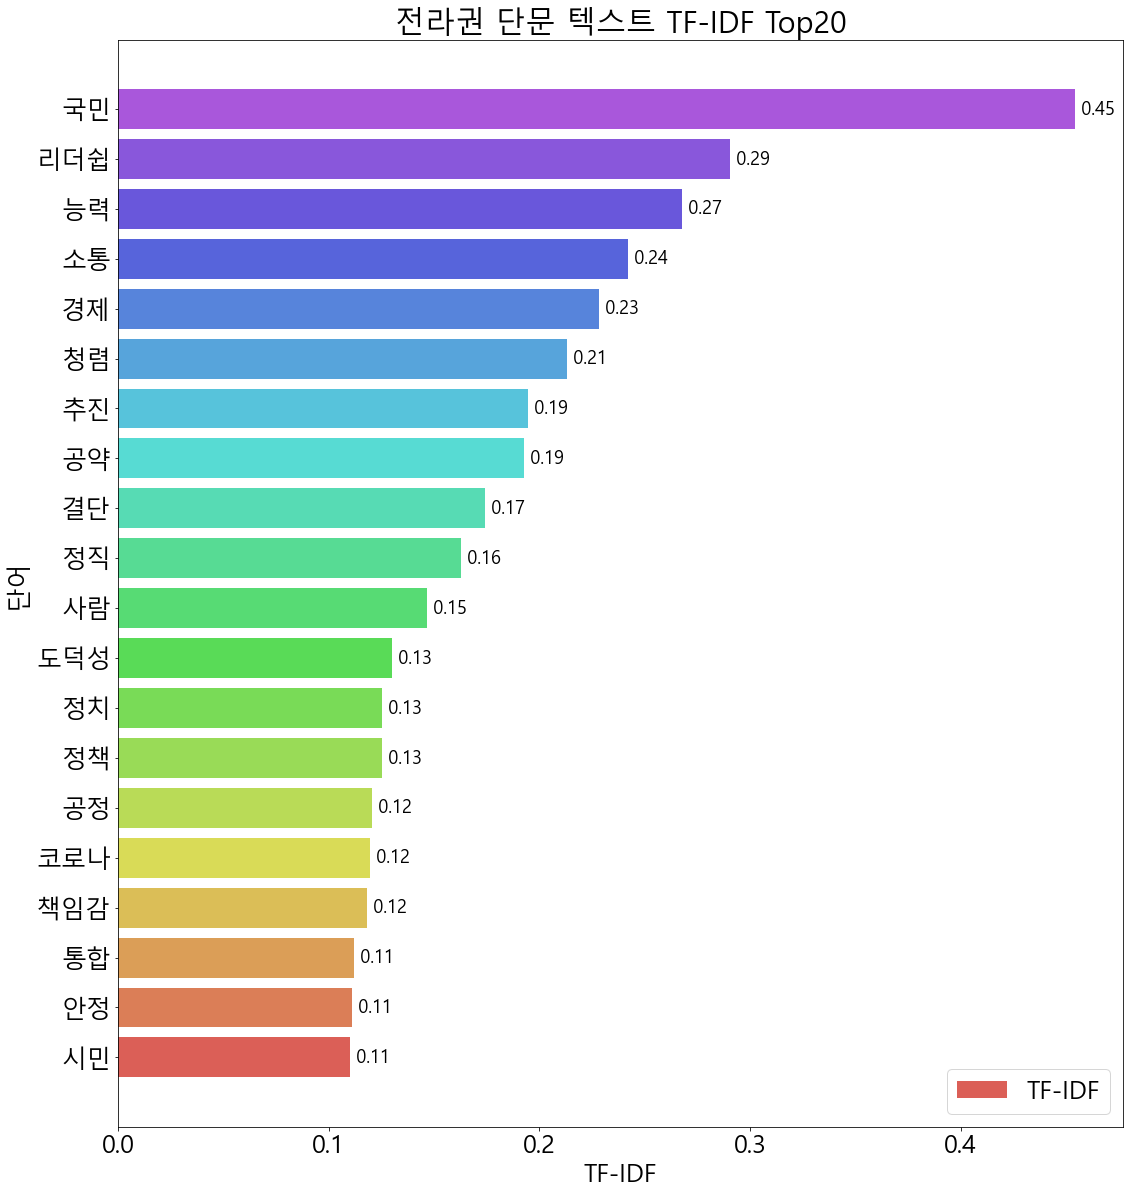

In [53]:
tfidf_graph(junla_tfidf_word, junla_tfidf, '전라권 단문')

## 강원권

In [54]:
kangwon_tfidf_word, kangwon_tfidf = tfidf_data(kangwon)

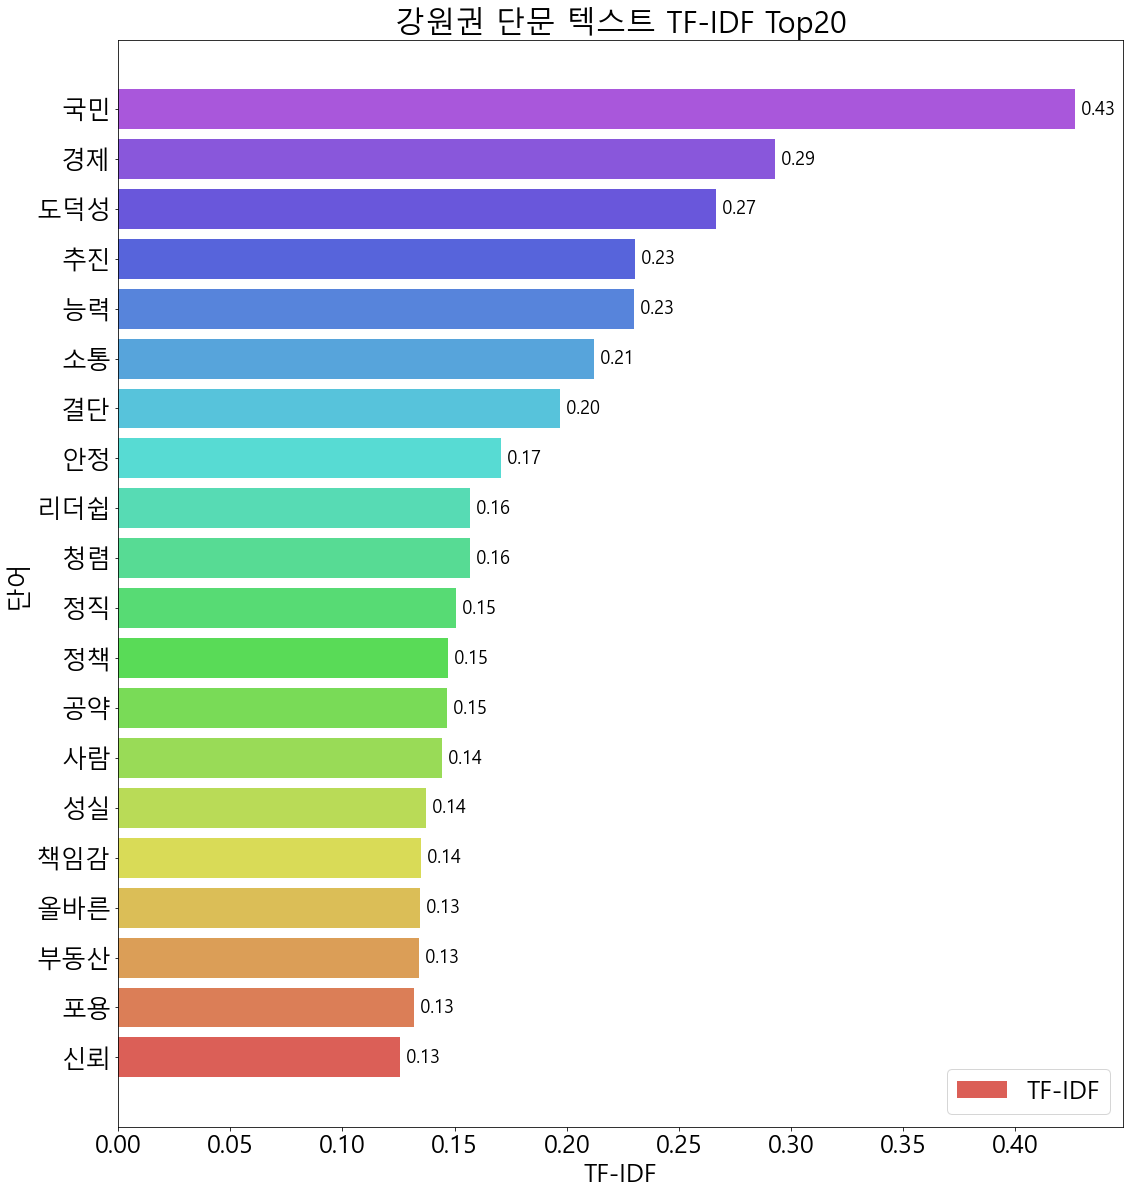

In [55]:
tfidf_graph(kangwon_tfidf_word, kangwon_tfidf, '강원권 단문')

## 경상권

In [56]:
kyungsang_tfidf_word, kyungsang_tfidf = tfidf_data(kyungsang)

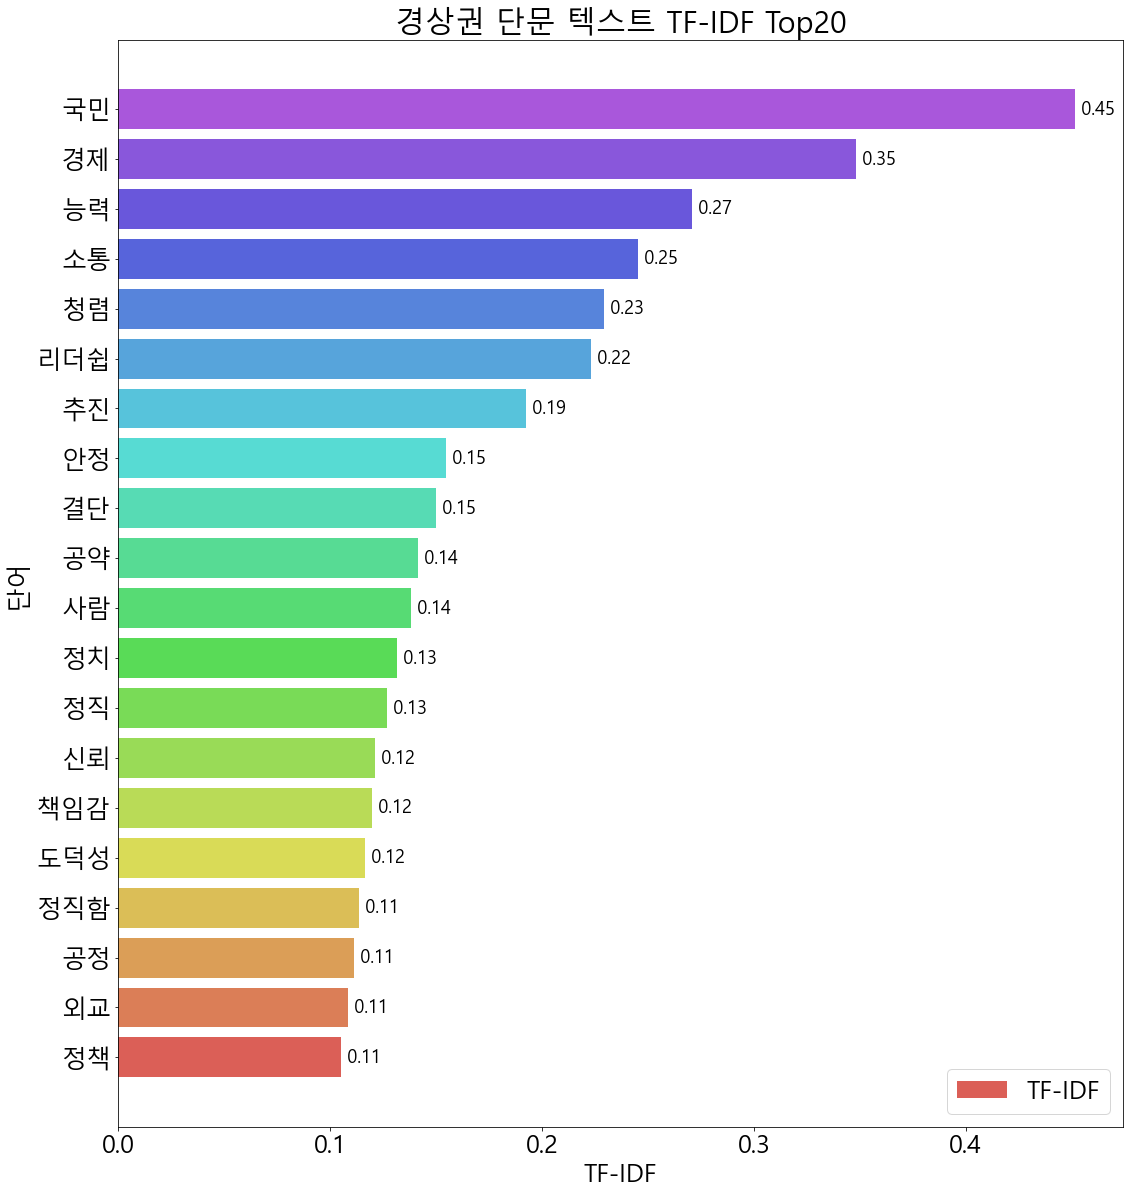

In [57]:
tfidf_graph(kyungsang_tfidf_word, kyungsang_tfidf, '경상권 단문')

## 제주도

In [58]:
jeju_tfidf_word, jeju_tfidf = tfidf_data(jeju)

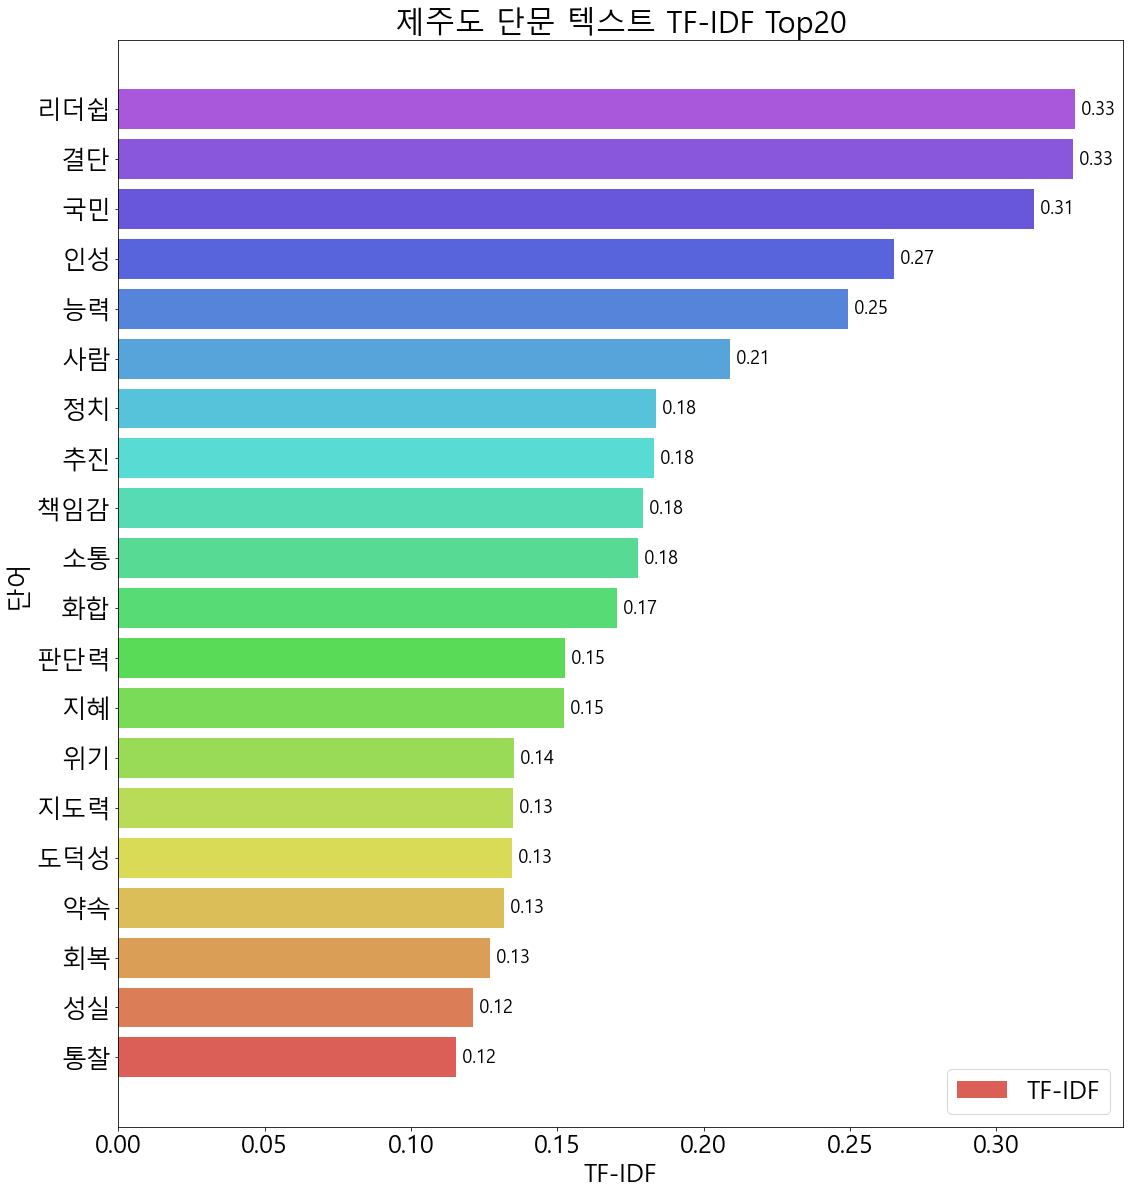

In [59]:
tfidf_graph(jeju_tfidf_word, jeju_tfidf, '제주도 단문')

## 비수도권

In [60]:
non_sudo_tfidf_word, non_sudo_tfidf = tfidf_data(non_sudo)

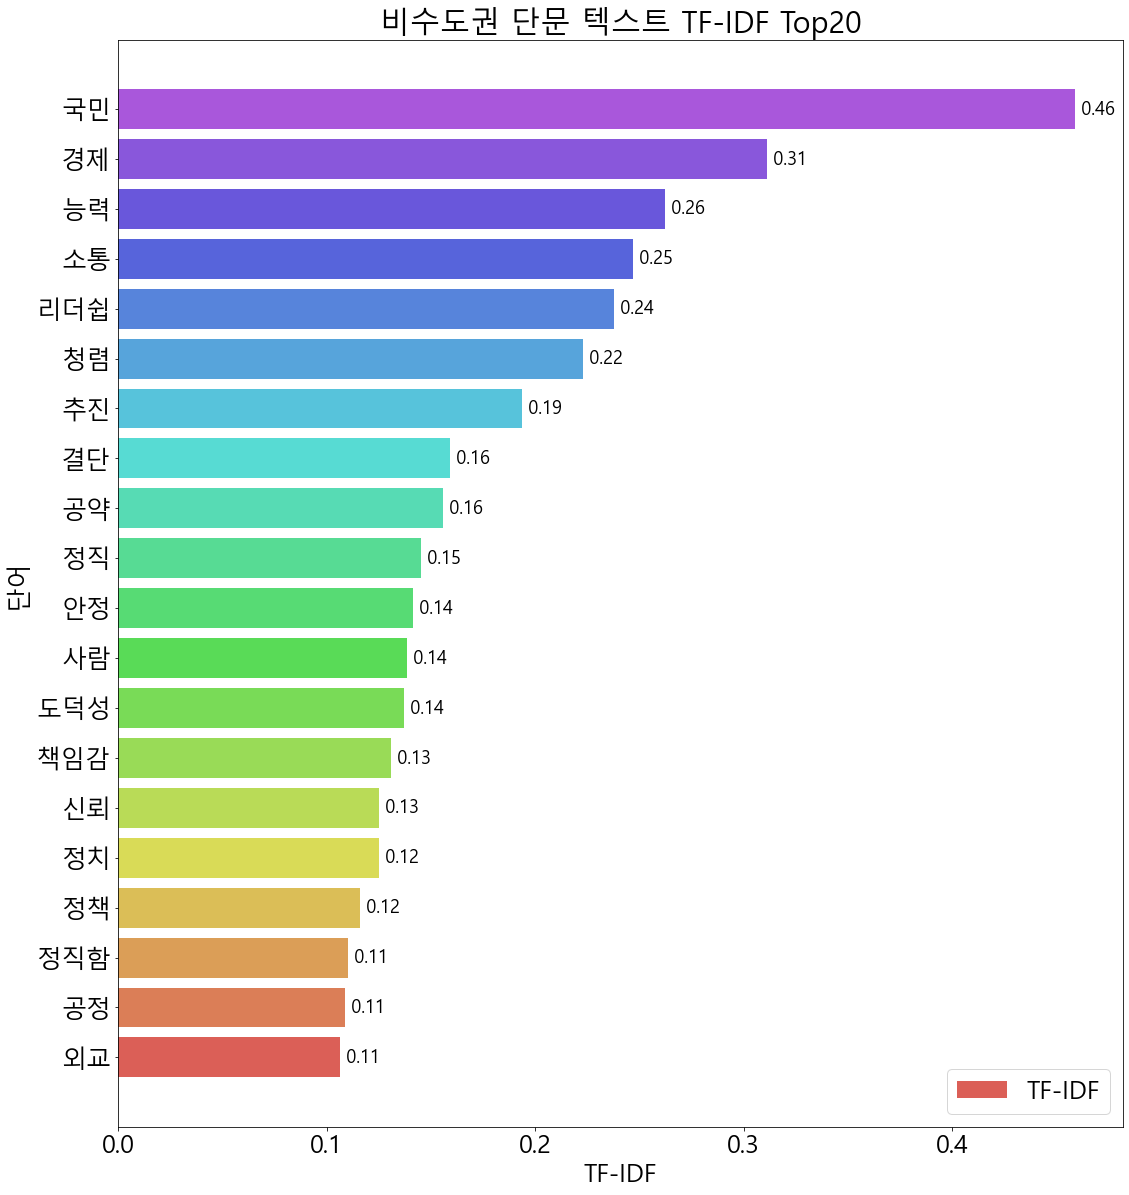

In [61]:
tfidf_graph(non_sudo_tfidf_word, non_sudo_tfidf, '비수도권 단문')